# 偏最小平方回歸 (Partial Least Square Regression)

##### 先引入我們需要的packages

In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
from random import choices
from mpl_toolkits.mplot3d import Axes3D
from tqdm.notebook import tqdm

# Training Data

In [2]:
# p0~p9代表0次到9次方
N=1000
p11,p10,p9,p8,p7,p6,p5,p4,p3,p2,p1,p0=1,3,5,7,9,11,-12,-10,-8,-6,-4,-2
M=12
X=np.zeros((N,M))
y=np.zeros(N)
# 隨機產生數據點
power=[p11,p10,p9,p8,p7,p6,p5,p4,p3,p2,p1,p0]
for i in range(0,len(y)):
    X[i,:]=random.random(M)
    y[i]+=random.random()
y+=np.dot(X,power)

# PLS1 Algorithms

In [3]:
def PLS1(X,y,K):
    XX=np.zeros((N,M))
    XX=np.ndarray.copy(X)
    W=np.zeros((M,K+1))
    P=np.zeros((M,K))
    q=np.zeros(K)
    W[:,0]=np.dot(XX.T,y)/np.linalg.norm(np.dot(XX.T,y))
    t=np.dot(XX,W[:,0])
    for k in range(0,K):
        t_norm=t/np.dot(t,t)
        P[:,k]=np.dot(XX.T,t_norm)
        q[k]=np.dot(y,t_norm)
        if(K>k):
            XX-=np.dot(t,t)*np.outer(t_norm,P[:,k])
            W[:,k+1]=np.dot(XX.T,y)
            t=np.dot(XX,W[:,k+1])
    W=W[:,:K]
    B=np.dot(np.dot(W,np.linalg.inv(np.dot(P.T,W))),q)
    B_0=q[0]-np.dot(P[:,0].T,B)
    return B,B_0

# Result

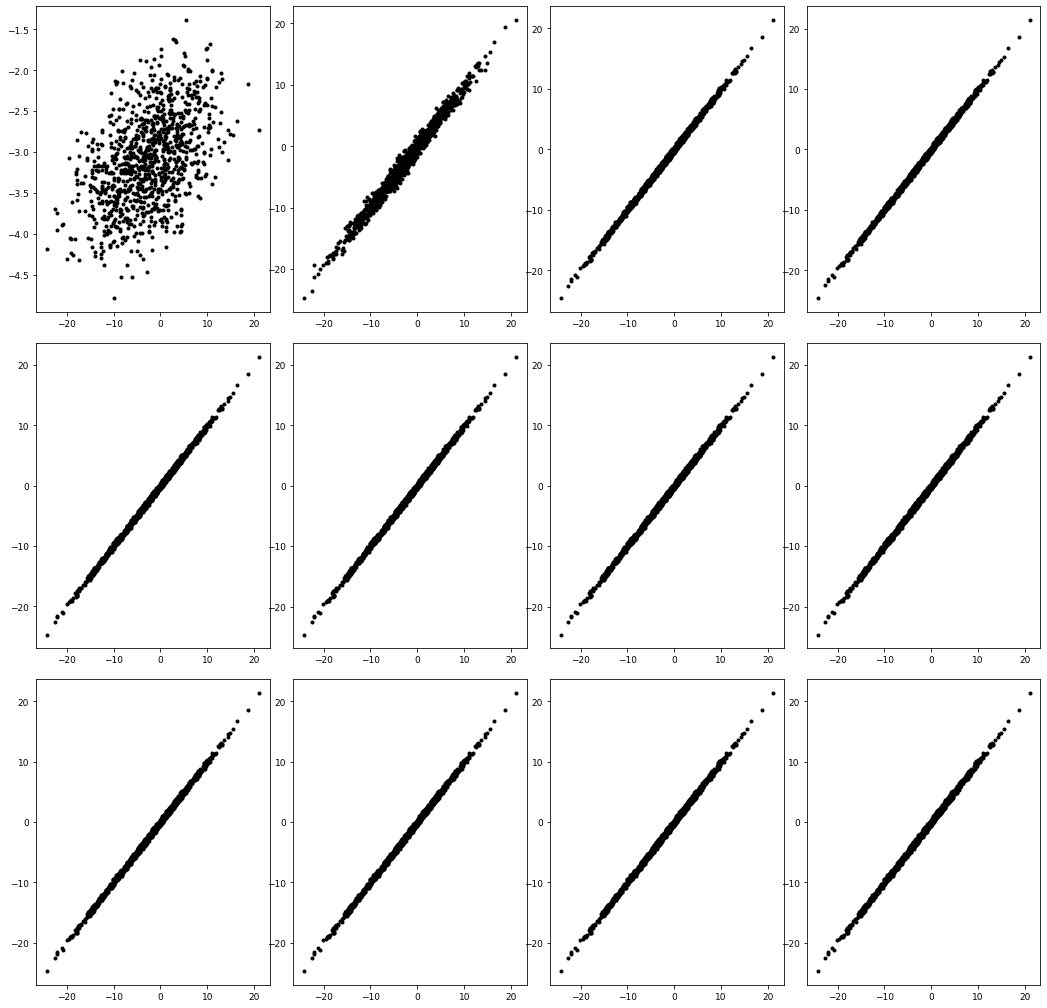

In [4]:
error=np.zeros(M)
plt.rcParams["figure.figsize"] = (18,18)
fig , ax = plt.subplots()
fig.subplots_adjust(hspace=0.1, wspace=0.1)
for i in range(1,M+1):
    plt.subplot(3, 4, i)
    B,B_0=PLS1(X,y,i)
    y_fit=np.dot(X,B)+B_0
    error[i-1]=sum((y-y_fit)**2)/N
    plt.plot(y,y_fit,"ko",markersize=3)
    plt.xticks(fontsize=9)
    plt.yticks(fontsize=9)
plt.show()

# Error

In [5]:
for i in range(0,M):
    print("K =",i+1,"the MSE =",error[i])

K = 1 the MSE = 47.841284532301835
K = 2 the MSE = 0.7657302945580261
K = 3 the MSE = 0.09272192631537164
K = 4 the MSE = 0.09021474416977711
K = 5 the MSE = 0.09019677277818931
K = 6 the MSE = 0.09019667268123813
K = 7 the MSE = 0.09019667253451544
K = 8 the MSE = 0.09019667253359566
K = 9 the MSE = 0.09019667253358603
K = 10 the MSE = 0.09019667253358608
K = 11 the MSE = 0.09019667253358585
K = 12 the MSE = 0.09019667253358615
